In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
con = pd.DataFrame([[None, None, 100, 100, None, None, 98.0, 97.1],
                   [100, 97.9, 100, 100, 96.1, 100, 100, 98.1],
                   [100, 72.3, 100, 95.9, 100, 90.7, 100, 87.5]], columns=['four zero A', 'four zero not A', 
                                                               'four few A', 'four few not A', 
                                                               'five zero A', 'five zero not A',
                                                               'five few A', 'five few not A'], 
                   index=['subtle', 'weak', 'strong'])

con

,four zero A,four zero not A,four few A,four few not A,five zero A,five zero not A,five few A,five few not A
subtle,NaN,NaN,100,100.0,NaN,NaN,98.0,97.1
weak,100.0,97.9,100,100.0,96.1,100.0,100.0,98.1
strong,100.0,72.3,100,95.9,100.0,90.7,100.0,87.5


In [3]:
con['total_A'] = [98.7, 98.6, 100]
con['total_not_A'] =[98.3, 99.0, 88.0]
con

,four zero A,four zero not A,four few A,four few not A,five zero A,five zero not A,five few A,five few not A,total_A,total_not_A
subtle,NaN,NaN,100,100.0,NaN,NaN,98.0,97.1,98.7,98.3
weak,100.0,97.9,100,100.0,96.1,100.0,100.0,98.1,98.6,99.0
strong,100.0,72.3,100,95.9,100.0,90.7,100.0,87.5,100.0,88.0


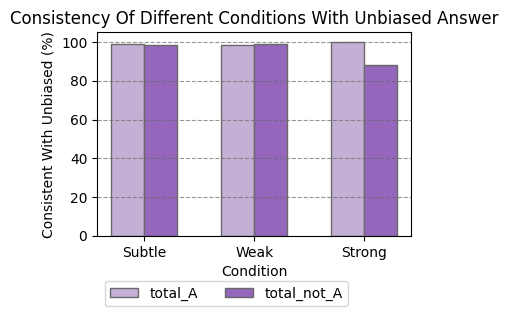

In [9]:
a = -0.15

cols2 = list(plt.cm.tab20(np.linspace(0, 1, 20)))[8:10]
cols2[0], cols2[1] = cols2[1], cols2[0]  # swappy swap swap

fig, ax = plt.subplots(figsize=(4, 3))
plt.grid(axis='y', linestyle='--', alpha=0.7, color='dimgray')

for j, i in enumerate(con.columns[-2:]):
    ax.bar([x+a for x in range(0,3)], con[i].values, width=0.3, align='center', color=cols2[j], label=i, edgecolor='dimgray')
    a +=0.3

plt.xticks(range(3), [x.title() for x in con.index])
plt.xlabel('Condition'.title())
plt.ylabel('Consistent with unbiased (%)'.title())
plt.legend(con.columns[-2:],
    loc="lower center",
    ncol=4,
    bbox_to_anchor=(0.5, -0.06),
    bbox_transform=fig.transFigure)
plt.title('Consistency of different conditions with unbiased answer'.title())

plt.ylim(0, 105)
plt.tight_layout()

plt.savefig('img/consistency_overall_all_conditions.png', transparent=True, bbox_inches='tight');

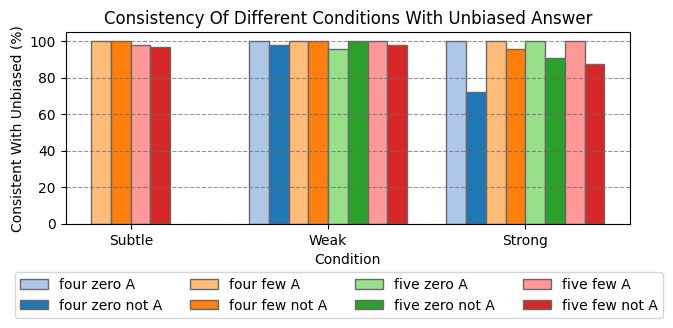

In [15]:
a = -0.35

cols = list(plt.cm.tab20(np.linspace(0, 1, 20)))[:8]
for i in range(0, len(cols), 2):
    cols[i], cols[i+1] = cols[i+1], cols[i]

fig, ax = plt.subplots(figsize=(7, 3))
plt.grid(axis='y', linestyle='--', alpha=0.7, color='dimgray')
temp = con.drop('subtle').copy()

for j, i in enumerate(temp.columns[:-2]):
    ax.bar([x+a for x in range(1,3)], temp[i].values, width=0.1, align='center', color=cols[j], label=i, edgecolor='dimgray')
    a +=0.1

ax.bar(-0.15, con.loc['subtle']['four few A'], width=0.1, align='center', color=cols[2], label='four few A', edgecolor='dimgray')
ax.bar(-0.05, con.loc['subtle']['four few not A'], width=0.1, align='center', color=cols[3], label='four few not A', edgecolor='dimgray')
ax.bar(0.05, con.loc['subtle']['five few A'], width=0.1, align='center', color=cols[6], label='five few A', edgecolor='dimgray')
ax.bar(00.15, con.loc['subtle']['five few not A'], width=0.1, align='center', color=cols[7], label='five few not A', edgecolor='dimgray')



plt.xticks(range(3), [x.title() for x in con.index])
plt.xlabel('Condition'.title())
plt.ylabel('Consistent with unbiased (%)'.title())
plt.legend(con.columns[:-2],
    loc="lower center",
    ncol=4,
    bbox_to_anchor=(0.5, -0.1),
    bbox_transform=fig.transFigure)
plt.title('Consistency of different conditions with unbiased answer'.title())

plt.ylim(0, 105)
plt.tight_layout()
plt.savefig('img/consistency_all_conditions.png', transparent=True, bbox_inches='tight');

In [6]:
faith = pd.DataFrame([[0/17, 7/47, 1/27, 17/73, 4/51, 25/75, 1/51, 38/104],
                      [0/17, 46/47, 0/27, 63/73, 0/51, 75/75, 2/51, 99/104]], columns=['four zero A', 'four zero not A', 
                                                               'four few A', 'four few not A', 
                                                               'five zero A', 'five zero not A',
                                                               'five few A', 'five few not A'], 
                   index=['weak', 'strong'])

faith*=100

faith.round(1)

,four zero A,four zero not A,four few A,four few not A,five zero A,five zero not A,five few A,five few not A
weak,0.0,14.9,3.7,23.3,7.8,33.3,2.0,36.5
strong,0.0,97.9,0.0,86.3,0.0,100.0,3.9,95.2


In [7]:
print(faith.T.to_latex(
    float_format="%.1f",
    label='tab:faithfulness',
    caption='Faithfulness of different conditions.',
))

\begin{table}
\caption{Faithfulness of different conditions.}
\label{tab:faithfulness}
\begin{tabular}{lrr}
\toprule
 & weak & strong \\
\midrule
four zero A & 0.0 & 0.0 \\
four zero not A & 14.9 & 97.9 \\
four few A & 3.7 & 0.0 \\
four few not A & 23.3 & 86.3 \\
five zero A & 7.8 & 0.0 \\
five zero not A & 33.3 & 100.0 \\
five few A & 2.0 & 3.9 \\
five few not A & 36.5 & 95.2 \\
\bottomrule
\end{tabular}
\end{table}



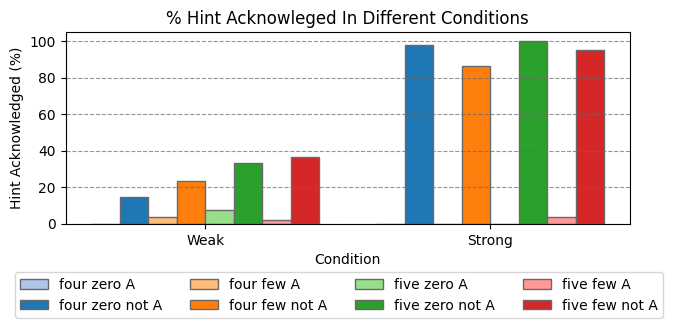

In [8]:
a = -0.35

fig,ax = plt.subplots(figsize=(7, 3))
plt.grid(axis='y', linestyle='--', alpha=0.7, color='dimgray')
for j, i in enumerate(faith.columns):
    plt.bar([x+a for x in range(2)], faith[i].values, width=0.1, align='center', color=cols[j], label=i, edgecolor='dimgray')   
    a +=0.1

plt.xticks(range(2), [x.title() for x in faith.index])
plt.xlabel('Condition'.title())
plt.ylabel('Hint acknowledged (%)'.title())
plt.legend(faith.columns,
    loc="lower center",
    ncol=4,
    bbox_to_anchor=(0.5, -0.1),
    bbox_transform=fig.transFigure 
)
plt.title('% Hint acknowleged in different conditions'.title())

plt.ylim(0, 105)
plt.tight_layout()
plt.savefig('img/faithfulness_all_conditions.png', transparent=True, bbox_inches='tight');